### The Dataset

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Disease" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.<br>
Data Source: https://www.kaggle.com/uciml/indian-liver-patient-records

<b>Columns:</b><br>
Age of the patient<br>
Gender of the patient<br>
Total Bilirubin<br>
Direct Bilirubin<br>
Alkaline Phosphotase<br>
Alamine Aminotransferase<br>
Aspartate Aminotransferase<br>
Total Protiens<br>
Albumin<br>
Albumin and Globulin Ratio<br>
Disease: field used to split the data into two sets (patient with liver disease (1), or no disease (2))

### Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the dataset

In [22]:
# Read a comma-separated values (csv) file into DataFrame.
df=pd.read_csv('liver_disease.csv')

print('Number of data records:',df.shape[0])
print('Number of features:',df.shape[1])

# display first five records of the dataframe.
df.head()

Number of data records: 583
Number of features: 11


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [23]:
# Summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Disease                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [24]:
df['Disease']=df['Disease'].apply(lambda x: 0 if x==2 else 1)

### Exploratory Data Analysis

Number of patients with liver disease: 416
Number of patients with no liver disease: 167


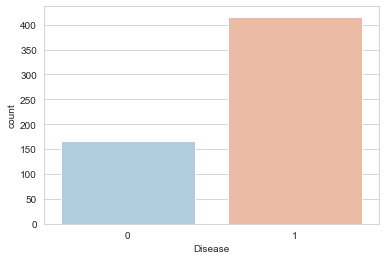

In [25]:
print('Number of patients with liver disease:', df['Disease'].value_counts()[1])
print('Number of patients with no liver disease:', df['Disease'].value_counts()[0])

# The counts of observations in each categorical bin of target variable, using bars.
sns.set_style('whitegrid')
sns.countplot(x='Disease',data=df,palette='RdBu_r')

Note: It can be observed that the dataset is imbalance. This is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other class.

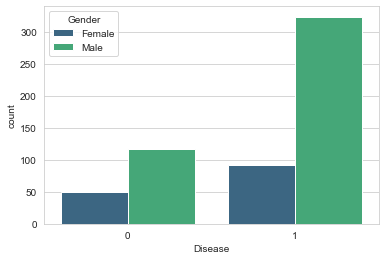

In [26]:
# The counts of observations in each categorical bin of target variable with respect to gender, using bars.
sns.set_style('whitegrid')
sns.countplot(x='Disease',hue='Gender',data=df, palette='viridis')

In [27]:
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Female' else 0)

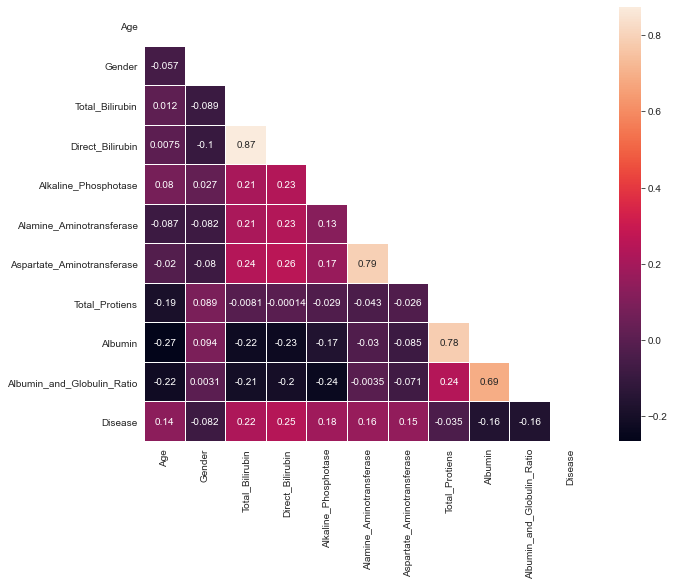

In [28]:
# Pearson Correlation Heatmap
plt.figure(figsize=(10,8))

# correlation
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# heatmap
sns.heatmap(corr, linewidths=0.1, annot=True, mask=mask)

In [29]:
# Separating independent and target variable.
X=df.iloc[:, :-1]
y=df['Disease']

### Handling Imbalanced Data

In [30]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

### Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=40,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40, random_state=42)

### Model Performance Evaluation

[[102  12]
 [ 26  91]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       114
           1       0.88      0.78      0.83       117

    accuracy                           0.84       231
   macro avg       0.84      0.84      0.84       231
weighted avg       0.84      0.84      0.84       231



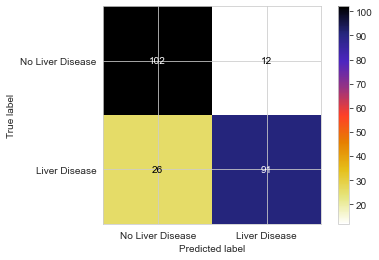

In [33]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix 

# prediction on unseen data
y_pred_rf=rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
plot_confusion_matrix(rf, X_test, y_test, cmap='CMRmap_r', display_labels=['No Liver Disease', 'Liver Disease'])
print(classification_report(y_test, y_pred_rf))

In [34]:
# saving the weights of trained model.
import pickle
pickle_out=open("liverdisease.pkl", "wb")
pickle.dump(rf, pickle_out)
pickle_out.close()